<center>
    <h1> Scientific Programming in Python  </h1>
    <h2> Topic 1: Introduction and basic tools </h2> 
</center>

_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - DI UTFSM - April 2017._

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## Table of Contents
* [1.- Anaconda](#anaconda)
* [2.- GIT](#git)
* [3.- IPython](#ipython)
* [4.- Jupyter Notebook](#jupyter)
* [5.- Inside Ipython and Kernels](#inside)
* [6.- Magics](#magics)

<div id='anaconda' />
## 1.- `Anaconda`

Although Python is an open-source, cross-platform language, installing it with the usual scientific packages used to be _overly complicated_. Fortunately, there is now an all-in-one scientific Python distribution, `Anaconda` (by Continuum Analytics), that is free, cross-platform, and easy to install. 

**Note**: There are other distributions and installation options (like Canopy, WinPython, Python(x, y), and others).

Why to use Anaconda:
1. User level install of the version of python you want.
2. Able to install/update packages completely independent of system libraries or admin privileges.
3. No risk of messing up required system libraries.
4. Comes with the `conda` manager which allows us to handle the packages and magage environments.
5. It "completely" solves the problem of packages dependencies.
6. Most important scientific packages (`NumPy`, `SciPy`, `Scikit-Learn` and others) are compiled with MKL support.
7. **Many scientific communities are using it!**.

**Note:** In this course we will use [`Python3`](https://www.continuum.io/downloads).

### Installation

Download installation script [here](https://www.continuum.io/downloads). Run in a terminal:
```bash
 bash Anaconda3-4.3.1-Linux-x86_64.sh
```
Then modify the `PATH` _environment variable_ in your `~/.bashrc` appending the next line:
```bash
export PATH=~/anaconda3/bin:$PATH
```
Run `source ~/.bashrc` and test your installation by calling the python interpreter!

### Conda and useful comands

* Install packages
```bash
conda install package_name
```
* Update packages
```bash
conda update package_name
conda update --all
```
* Search packages
```bash
conda search package_pattern
```
* Clean Installation
```bash
conda clean {--lock, --tarballs, --index-cache, --packages, --source-cache, --all}
```

### Environments
Isolated distribution of packages.

* Create an environments
```bash
conda create --name env_name python=version packages_to_install_in_env
conda create --name python2 python=2.7 anaconda
conda create --name python26 python=2.6 python
```
* Switch to environments
```bash
source activate env_name
```
* List all available environments
```bash
conda info --envs
```
* Delete an environment
```bash
conda remove --name env_name --all
```

**Important Note**: If you install packages with `pip`, they will be installed in the running environment.

For more info about conda see [here](https://conda.io/docs/intro.html)

<div id='git' />
## 2.- `Git`

Git is a _version control system_ (VCS) for tracking changes in computer files and coordinating work on those files among multiple people. It is primarily used for software development, but it can be used to keep track of changes in any files. As a _distributed revision control system_ it is aimed at speed, data integrity, and support for distributed, non-linear workflows.

![Git Cartoon](data/git.png)

Online providers supporting Git include GitHub (https://github.com), Bitbucket (https://bitbucket.org), Google code (https://code.google.com), Gitorious (https://gitorious.org), and SourceForge (https://sourceforge.net).


In order to get your git repository ready for use, follow these instructions:

1. Create the project directory.
```bash
mkdir project && cd project
```
2. Initialize the local directory as a Git repository.
```bash
git init
```
3. Add the files in your new local repository. This stages them for the first commit.
```bash
touch README
git add .
# To unstage a file, use 'git reset HEAD YOUR-FILE'.
```
4. Commit the files that you've staged in your local repository.
```bash
git commit -m "First commit"
# To remove this commit and modify the file, use 'git reset --soft HEAD~1' and commit and add the file again.
```
5. Add the URL for the remote repository where your local repository will be pushed.
```bash
git remote add origin remote_repository_URL
# Sets the new remote
git remote -v
# Verifies the new remote URL
```
6. Push the changes in your local repository to GitHub.
```bash
git push -u origin master
```

<div id='ipython' />
## 3.- `IPython`

`IPython` its just an __improved version of the standard `Python` shell__, that provides tools for interactive computing in Python. 

Here are some cool features of `IPython`:

* Better syntax highlighting.
* Code completion.
* Direct access to bash/linux commands (`cd`, `ls`, `pwd`, `rm`, `mkdir`, etc). Additional commands can be exectuted with: `!command`.
* `who` command to see defined variables in the current session.
* Inspect objects with `?`.
* And __magics__, which we will see briefly. 

<div id='jupyter' />
## 4.- `Jupyter Notebook`

It is a web-based interactive environment that combines **code**, **rich text**, **images**, **videos**, **animations**, **mathematics**, and **plots** into a single document. This modern tool is an ideal gateway to high-performance numerical computing and data science in Python.

### New paragraph

This is *rich* **text** with [links](http://ipython.org), equations:
$$
\hat{f}(\xi) = \int_{-\infty}^{+\infty} f(x) \, \mathrm{e}^{-i \xi x} dx,
$$
code with syntax highlighting
```python
def fibonacci(n):
  if n <= 1:
    return n
  else:
    return fibonacci(n-1) + fibonacci(n-2)
```
images: ![This is an image](data/mindblow.jpeg)

and plots:

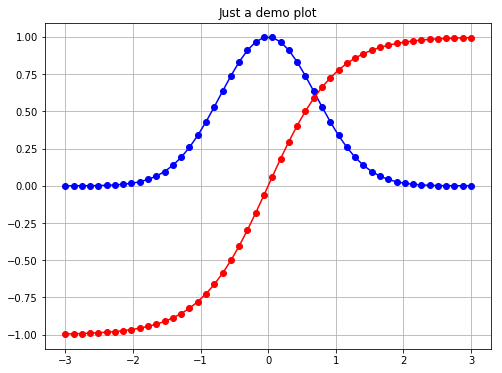

In [2]:
xgrid = np.linspace(-3,3,50)
f1 = np.exp(-xgrid**2)
f2 = np.tanh(xgrid)
plt.figure(figsize=(8,6))
plt.plot(xgrid, f1, 'bo-')
plt.plot(xgrid, f2, 'ro-')
plt.title('Just a demo plot')
plt.grid()
plt.show()

IPython also comes with a sophisticated display system that lets us insert rich web elements in the notebook. Here you can see an example of how to add Youtube videos in a notebook

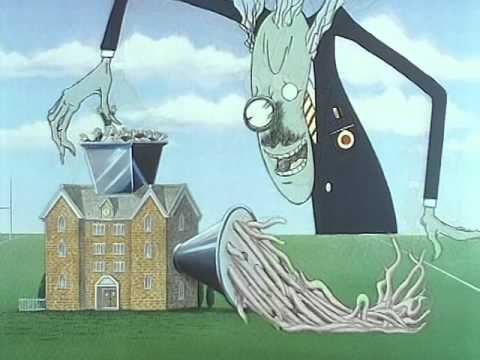

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('HrxX9TBj2zY')

<div id='inside' />
## 5.- Inside `Ipython` and `Kernels`

**The IPython Kernel** is a separate `IPython` process which is responsible for running user code, and things like computing possible completions. Frontends, like the notebook or the Qt console, communicate with the `IPython Kernel` using JSON messages sent over ZeroMQ sockets.

The core execution machinery for the kernel is shared with terminal IPython:
![image](data/nb01.png)
A kernel process __can be connected to more than one frontend simultaneously__. In this case, __the different frontends will have access to the same variables__.


### The Client-Server architecture

The Notebook frontend does something extra. In addition to running your code, it _stores code and output_, together with _markdown notes_, in an editable document called a _notebook_. When you save it, this is sent from your browser to the notebook server, which saves it on disk as a _JSON_ file with a .ipynb extension.
![image](data/nb03.png)

The notebook server, not the kernel, is responsible for saving and loading notebooks, so **you can edit notebooks even if you don’t have the kernel for that language** —you just won’t be able to run code. The **kernel doesn’t know anything about the notebook document**: it just gets sent cells of code to execute when the user runs them.


### Others `Kernels`

There are two ways to develop a kernel for another language. **Wrapper kernels** reuse the communications machinery from IPython, and implement only the core execution part. **Native kernels** implement execution and communications in the target language:
![image](data/nb02.png)

**Note:** To see a list of all available kernels (and installation instructions) visit [here](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels).


### Convert notebooks to other formats
It is also possible to convert the original JSON notebook to the following formats: **html**, **latex**, **pdf**, **rst**, **markdown** and **script**. For that you must run
```bash
jupyter-nbconvert --to FORMAT notebook.ipynb
```
with FORMAT as one of the above options. **Lets convert this notebook to htlm!**

<div id='magics' />
## 6.- `Magics`

`IPython magics` are custom commands that let you interact with your `OS` and filesystem. There are line magics `%` (which just affect the behavior of such line) and cell magics `%%` (which affect the whole cell). 

Here we test some useful `magics`:

In [4]:
# this will list all magic commands
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [5]:
# also work in ls, cd, mkdir, etc
%pwd

'/Users/mavillan/Repositories/SciProg/01_intro'

In [6]:
%history

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
xgrid = np.linspace(-3,3,50)
f1 = np.exp(-xgrid**2)
f2 = np.tanh(xgrid)
plt.figure(figsize=(8,6))
plt.plot(xgrid, f1, 'bo-')
plt.plot(xgrid, f2, 'ro-')
plt.title('Just a demo plot')
plt.grid()
plt.show()
from IPython.display import YouTubeVideo
YouTubeVideo('HrxX9TBj2zY')
# this will list all magic commands
%lsmagic
# also work in ls, cd, mkdir, etc
%pwd
%history


In [18]:
# this will execute and show the output of the program
%run ./hola_mundo.py

Hola mundo!


In [19]:
def naive_loop():
    for i in range(100):
        for j in range(100):
            for k in range(100):
                a = 1+1
    return None

%timeit -n 10 naive_loop()

10 loops, best of 3: 29.8 ms per loop


In [20]:
%time naive_loop()

CPU times: user 32.8 ms, sys: 1.81 ms, total: 34.6 ms
Wall time: 33.7 ms


In [10]:
%%bash
cd ..
ls

01_intro
02_numpy
LICENSE
README.md
programa.pdf
programacion_cientifica.numbers
references


 lets you capture the standard output and error output of some code into a Python variable. 
 Here is an example (the outputs are captured in the output Python variable).

In [11]:
%%capture output
!ls

In [12]:
%%writefile myfile.txt
Holanda que talca!

Writing myfile.txt


In [13]:
!cat myfile.txt
!rm myfile.txt

Holanda que talca!

### Writting our own magics!

In this section we will create a new cell magic that compiles and executes C++ code in the Notebook.

In [14]:
from IPython.core.magic import register_cell_magic

To create a new cell magic, we create a function that takes a line (containing possible options) and a cell's contents as its arguments, and we decorate it with `@register_cell_magic`.

In [15]:
@register_cell_magic
def cpp(line, cell):
    """Compile, execute C++ code, and return the
    standard output."""
    # We first retrieve the current IPython interpreter instance.
    ip = get_ipython()
    # We define the source and executable filenames.
    source_filename = '_temp.cpp'
    program_filename = '_temp'
    # We write the code to the C++ file.
    with open(source_filename, 'w') as f:
        f.write(cell)
    # We compile the C++ code into an executable.
    compile = ip.getoutput("g++ {0:s} -o {1:s}".format(
              source_filename, program_filename))
    # We execute the executable and return the output.
    output = ip.getoutput('./{0:s}'.format(program_filename))
    print('\n'.join(output))

In [16]:
%%cpp
#include<iostream>
int main() 
{
    std::cout << "Hello world!";
}

Hello world!


This cell magic is currently only available in your interactive session. To distribute it, you need to create an **IPython extension**. This is a regular Python module or package that extends IPython.

To create an IPython extension, copy the definition of the `cpp()` function (without the decorator) to a Python module, named `cpp_ext.py` for example. Then, add the following at the end of the file:

```python
def load_ipython_extension(ipython):
       """This function is called when the extension is loaded.
       It accepts an IPython InteractiveShell instance.
       We can register the magic with the `register_magic_function`
       method of the shell instance."""
       ipython.register_magic_function(cpp, 'cell')
```

Then, you can load the extension with %load_ext cpp_ext. The cpp_ext.py  le needs to be in the PYTHONPATH, for example in the current directory.

In [17]:
%load_ext cpp_ext